### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
import numpy as np

### Reading the Data

In [2]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Handling Missing Values
-  Missing values can be handled in many ways using some inbuilt methods.
-  In my Data set there are no missing values.

### Categorical Data

In [3]:
df.columns = ["buying","maint","doors","persons","lug_boot","safety","value"]
df.head()

,buying,maint,doors,persons,lug_boot,safety,value
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'value']
for col in col_names:
    print(df[col].value_counts())

high     432
low      432
med      432
vhigh    431
Name: buying, dtype: int64
high     432
low      432
med      432
vhigh    431
Name: maint, dtype: int64
3        432
5more    432
4        432
2        431
Name: doors, dtype: int64
more    576
4       576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
high    576
med     576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: value, dtype: int64


In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
value       0
dtype: int64

### Data Visualization

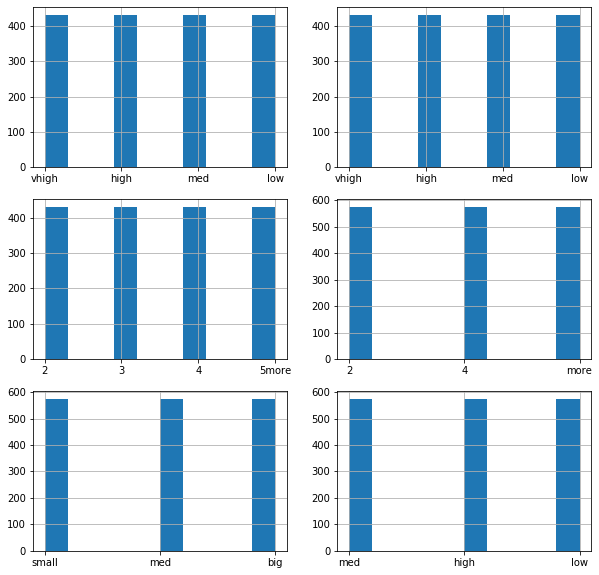

In [6]:
%matplotlib inline
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
i=0
j=0
k=0
fig, ax = plt.subplots(3,2, figsize = (10,10))
for i in range(3):
  for j in range(2):
    df[cols[k]].hist(ax=ax[i][j])
    k=k+1

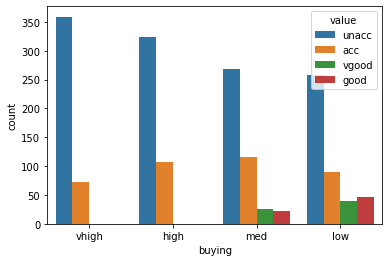

In [6]:
import seaborn as sns
sns.countplot(df['buying'],hue = df['value'])

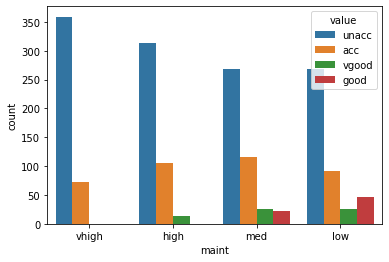

In [7]:
sns.countplot(df['maint'],hue = df['value'])

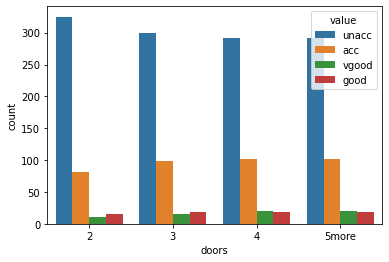

In [8]:
sns.countplot(df['doors'],hue = df['value'])

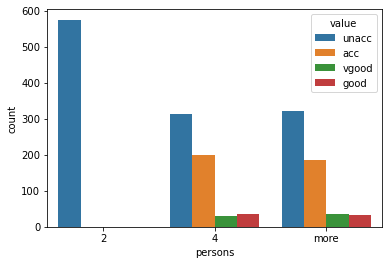

In [9]:
sns.countplot(df['persons'],hue = df['value'])

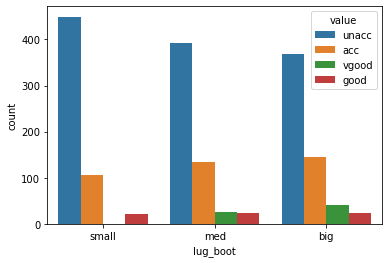

In [10]:
sns.countplot(df['lug_boot'],hue = df['value'])

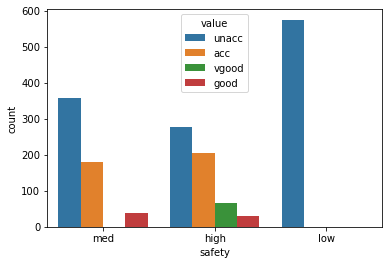

In [11]:
sns.countplot(df['safety'],hue = df['value'])

### Data Description
#### Features:
- buying : vhigh, high, med, low. 
- maint : vhigh, high, med, low.
- doors : 2, 3, 4, 5 more.
- persons : 2, 4 more.
- lug_boot : small, med, big. 
- safety : low, med, high. 

### Independent Vec
- buying : unacc, acc, good, vgood.

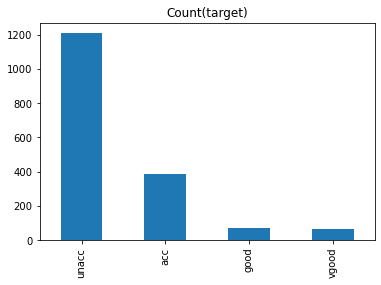

In [13]:
# imbalanced 
df.value.value_counts().plot(kind = 'bar', title = 'Count(target)')

#####  As data is Highly imbalanced this may result is overfitting 

#### Techniques to handle Imbalanced Dataset:
1) Use the right evaluation metrics \
2) Under Sampling (DownSampling Majority Class) \
3) Over Sampling (UpSampling of Minority Class) \
4) Generate synthetic samples

##### To over come it i am oversampling it

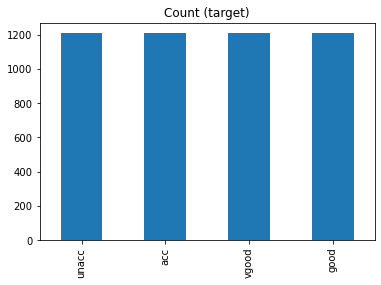

In [14]:
# oversampling --> data is equally balanced 
class_count = df.value.value_counts()
max_class = max(class_count)
df_class_0 = df[df['value'] == "acc"]
df_class_1 = df[df['value'] == "good"]
df_class_2 = df[df['value'] == "unacc"]
df_class_3 = df[df['value'] == "vgood"]
df_class_0_over = df_class_0.sample(max_class,replace = True)
df_class_1_over = df_class_1.sample(max_class,replace = True)
df_class_3_over = df_class_3.sample(max_class,replace = True)
data_os = pd.concat([df_class_0_over,df_class_1_over,df_class_3_over,df_class_2], axis = 0)
data_os.value.value_counts().plot(kind='bar', title='Count (target)');

### Data Cleaning
      As a part of Standarization the data i am relpacing the cars which has 5 or more number of doors and 5 or more people can sit i am Standadizing the value to 5.

In [15]:
data_os.doors = data_os.doors.replace({"5more": 5})
data_os.persons = data_os.persons.replace({"more": 5})
data_os.head()

,buying,maint,doors,persons,lug_boot,safety,value
1042,med,high,4,4,big,high,acc
985,med,high,2,4,med,high,acc
1426,low,high,2,5,med,high,acc
637,high,high,5,4,big,high,acc
634,high,high,5,4,med,high,acc


#### Mapping the catagorical data:    
    As Machine Learning can understand only numbers its time to encode the categorical datato its respective values in a traditional way without using label encoder or pandas

In [16]:
map1 = {"low" : 1, "med":2,"high":3, "vhigh": 4}
map2 = {"small" : 1, "med":2,"big":3}
data_os["buying"] = data_os["buying"].map(map1)
data_os["maint"] = data_os["maint"].map(map1)
data_os["safety"] = data_os["safety"].map(map1)
data_os["lug_boot"] = data_os["lug_boot"].map(map2)
data_os.head()

,buying,maint,doors,persons,lug_boot,safety,value
1042,2,3,4,4,3,3,acc
985,2,3,2,4,2,3,acc
1426,1,3,2,5,2,3,acc
637,3,3,5,4,3,3,acc
634,3,3,5,4,2,3,acc


In [17]:
data_os["doors"]  = pd.to_numeric(data_os["doors"])
data_os["persons"] = pd.to_numeric(data_os["persons"])

    For getting further more information in order to train the model well i am introducing a new type of coloumn that is car type

In [18]:
data_os["car_type"] = data_os["doors"]+data_os["persons"] # i have created a feature i.e. car_type
type_dict = {4:"Coupe",
             5:"Coupe",
             6:"GT",
             7:"Sedan",
             8:"Hatchback",
             9:"SUV",
             10:"SUV"}
data_os["car_type"] = data_os["car_type"].astype('category')

### Training Model

#### Splitting Data:

In [19]:
target = ['value']
reject = target
features = [x for x in data_os.columns if x not in reject]
x = data_os[features]
y = data_os[target]

#### Train and Test Split:

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [21]:
xTrain.shape

(3627, 7)

In [22]:
xTest.shape

(1209, 7)

### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()
dec.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [24]:
pred = dec.predict(xTest)

##### accuracy score:

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred=pred,y_true=yTest)

0.9991728701406121

#### classification report:

In [26]:
from sklearn.metrics import classification_report

In [27]:
report = classification_report(y_true=yTest, y_pred=pred, output_dict=True)

In [28]:
df_dec = pd.DataFrame(report).transpose()

In [29]:
df_dec

,precision,recall,f1-score,support
acc,0.996711,1.000000,0.998353,303.000000
good,1.000000,1.000000,1.000000,308.000000
unacc,1.000000,0.996587,0.998291,293.000000
vgood,1.000000,1.000000,1.000000,305.000000
accuracy,0.999173,0.999173,0.999173,0.999173
macro avg,0.999178,0.999147,0.999161,1209.000000
weighted avg,0.999176,0.999173,0.999173,1209.000000


#### confusion matrix:

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confu_matrix = confusion_matrix(y_true=yTest,y_pred=pred)

In [32]:
confu_matrix

array([[303,   0,   0,   0],
       [  0, 308,   0,   0],
       [  1,   0, 292,   0],
       [  0,   0,   0, 305]], dtype=int64)

### Random Forest Classification

#### Model Creation:

In [33]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=51)

#### Model fitting:

In [34]:
model.fit(xTrain,yTrain)

C:\Users\Deepthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_jobs=-1, random_state=51)

#### Evaluating the model:

In [35]:
print(model.score(xTest,yTest))
print(sklearn.metrics.f1_score(yTest,model.predict(xTest),average='macro'))

0.9975186104218362
0.997482023506747


In [36]:
# Start the Training Process
ypred = model.predict(xTest)

##### accuracy score:

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yTest,ypred))

0.9975186104218362


#### classification report:

In [38]:
from sklearn.metrics import classification_report

In [39]:
report = classification_report(y_true=yTest, y_pred=ypred, output_dict=True)

In [40]:
df = pd.DataFrame(report).transpose()

In [41]:
df

,precision,recall,f1-score,support
acc,0.990196,1.000000,0.995074,303.000000
good,1.000000,1.000000,1.000000,308.000000
unacc,1.000000,0.989761,0.994854,293.000000
vgood,1.000000,1.000000,1.000000,305.000000
accuracy,0.997519,0.997519,0.997519,0.997519
macro avg,0.997549,0.997440,0.997482,1209.000000
weighted avg,0.997543,0.997519,0.997518,1209.000000


#### confusion matrix:

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confu_matrix = confusion_matrix(y_true=yTest,y_pred=ypred)

In [44]:
confu_matrix

array([[303,   0,   0,   0],
       [  0, 308,   0,   0],
       [  3,   0, 290,   0],
       [  0,   0,   0, 305]], dtype=int64)